In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

plt.style.use('fivethirtyeight')
%matplotlib inline 

Importing the data sets

In [0]:
#Importing the data sets
corona_confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
corona_deaths_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
corona_recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')


In [3]:
Retrive_Required_Dates_Columns = corona_confirmed_cases.keys()
print(Retrive_Required_Dates_Columns)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/5/20', '5/6/20', '5/7/20', '5/8/20', '5/9/20', '5/10/20', '5/11/20',
       '5/12/20', '5/13/20', '5/14/20'],
      dtype='object', length=118)


In [0]:
#Retriving the date columns i.e from 22nd jan to last date i.e yesterday
confirmedCases_ForGivenDates = corona_confirmed_cases.loc[:, Retrive_Required_Dates_Columns[4]:Retrive_Required_Dates_Columns[-1]]
deathsCases_ForGivenDates = corona_deaths_cases.loc[:, Retrive_Required_Dates_Columns[4]:Retrive_Required_Dates_Columns[-1]]
recoveredCases_ForGivenDates = corona_recovered_cases.loc[:, Retrive_Required_Dates_Columns[4]:Retrive_Required_Dates_Columns[-1]]

In [5]:
print(confirmedCases_ForGivenDates)

     1/22/20  1/23/20  1/24/20  1/25/20  ...  5/11/20  5/12/20  5/13/20  5/14/20
0          0        0        0        0  ...     4687     4963     5226     5639
1          0        0        0        0  ...      872      876      880      898
2          0        0        0        0  ...     5891     6067     6253     6442
3          0        0        0        0  ...      755      758      760      761
4          0        0        0        0  ...       45       45       45       48
..       ...      ...      ...      ...  ...      ...      ...      ...      ...
261        0        0        0        0  ...      208      208      220      235
262        0        0        0        0  ...       56       65       70       85
263        0        0        0        0  ...       11       11       11       11
264        0        0        0        0  ...      661      729      801      907
265        0        0        0        0  ...        0        0        1        1

[266 rows x 114 columns]


In [6]:
print(deathsCases_ForGivenDates)

     1/22/20  1/23/20  1/24/20  1/25/20  ...  5/11/20  5/12/20  5/13/20  5/14/20
0          0        0        0        0  ...      122      127      132      136
1          0        0        0        0  ...       31       31       31       31
2          0        0        0        0  ...      507      515      522      529
3          0        0        0        0  ...       48       48       49       49
4          0        0        0        0  ...        2        2        2        2
..       ...      ...      ...      ...  ...      ...      ...      ...      ...
261        0        0        0        0  ...        5        5        6        7
262        0        0        0        0  ...        9       10       12       12
263        0        0        0        0  ...        1        1        1        1
264        0        0        0        0  ...       21       21       23       29
265        0        0        0        0  ...        0        0        0        0

[266 rows x 114 columns]


In [7]:
print(recoveredCases_ForGivenDates)

     1/22/20  1/23/20  1/24/20  1/25/20  ...  5/11/20  5/12/20  5/13/20  5/14/20
0          0        0        0        0  ...      558      610      648      691
1          0        0        0        0  ...      654      682      688      694
2          0        0        0        0  ...     2841     2998     3058     3158
3          0        0        0        0  ...      550      568      576      596
4          0        0        0        0  ...       13       13       14       14
..       ...      ...      ...      ...  ...      ...      ...      ...      ...
248        0        0        0        0  ...        4        4        4        4
249        0        0        0        0  ...        1        1        1        1
250        0        0        0        0  ...        0        0        0        3
251        0        0        0        0  ...        0        0        0        0
252        0        0        0        0  ...        0        0        0        0

[253 rows x 114 columns]


In [8]:
corona_Registered_Dates = confirmedCases_ForGivenDates.keys()
print(len(corona_Registered_Dates))
print(corona_Registered_Dates)

114
Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/5/20', '5/6/20', '5/7/20', '5/8/20', '5/9/20', '5/10/20', '5/11/20',
       '5/12/20', '5/13/20', '5/14/20'],
      dtype='object', length=114)


In [0]:
TotalWorldCases_List = []
TotalDeathCases_List = [] 
TotalRecoveredCases_List = [] 



In [0]:
#For each date sum of all confirmed/death/recovered cases are calculated for all countries
for i in corona_Registered_Dates:
  # For each date confirmed/death/recovered cases calculation for all countries
    TotalConfirmedCases_ForEachDate = confirmedCases_ForGivenDates[i].sum()
    TotalDeathCases_ForEachDate = deathsCases_ForGivenDates[i].sum()
    TotalRecoveredCases_ForEachDate = recoveredCases_ForGivenDates[i].sum()
    
    # confirmed, deaths, recovered, and active
    TotalWorldCases_List.append(TotalConfirmedCases_ForEachDate)
    TotalDeathCases_List.append(TotalDeathCases_ForEachDate)
    TotalRecoveredCases_List.append(TotalRecoveredCases_ForEachDate)

   
   

    

In [11]:
print(TotalConfirmedCases_ForEachDate)

4442163


In [12]:
print(TotalDeathCases_List)

[17, 18, 26, 42, 56, 82, 131, 133, 171, 213, 259, 362, 426, 492, 564, 634, 719, 806, 906, 1013, 1113, 1118, 1371, 1523, 1666, 1770, 1868, 2007, 2122, 2247, 2251, 2458, 2469, 2629, 2708, 2770, 2814, 2872, 2941, 2996, 3085, 3160, 3254, 3347, 3459, 3558, 3801, 3987, 4263, 4614, 4722, 5408, 5830, 6472, 7150, 7956, 8823, 9946, 11422, 13125, 14825, 16759, 19014, 21785, 24788, 28288, 31798, 35323, 39439, 44238, 49675, 55817, 61812, 67981, 73077, 78767, 86662, 93354, 100882, 108113, 114146, 119853, 125561, 132439, 140659, 147946, 156804, 163214, 167772, 173097, 180236, 186912, 193665, 199997, 206187, 209900, 214444, 220801, 227665, 233360, 238619, 243813, 247470, 251537, 257239, 263855, 269567, 274898, 279311, 282709, 286330, 291942, 297197, 302418]


In [0]:
#Calculate daily increase of confirmed,deats and recovery
def CalculateDailyRiseOfCases(coronaCases):
        d = [] 
        for i in range(len(coronaCases)):
            if i == 0:
                d.append(coronaCases[0])
            else:
                d.append(coronaCases[i]-coronaCases[i-1])
        return d 


In [0]:
DailyIncrease_ForWorldCases = CalculateDailyRiseOfCases(TotalWorldCases_List)


In [15]:
print(DailyIncrease_ForWorldCases)

[555, 99, 287, 493, 684, 809, 2651, 588, 2068, 1693, 2111, 4749, 3094, 4011, 3743, 3159, 3597, 2729, 3030, 2612, 2040, 419, 15147, 6517, 2145, 2194, 2034, 1878, 503, 558, 622, 1753, 386, 603, 845, 982, 1358, 1366, 1899, 2358, 1937, 2534, 2280, 2766, 3915, 4046, 3974, 3769, 5030, 7255, 2477, 16871, 10895, 11352, 14154, 15510, 17741, 27756, 29632, 32317, 32438, 41264, 39824, 49645, 61971, 63737, 67394, 59437, 62210, 75108, 75042, 80827, 82416, 80166, 73684, 71693, 75002, 83794, 85323, 92395, 78082, 99113, 70015, 70406, 79858, 96368, 87842, 77609, 83544, 70940, 77319, 75562, 83795, 87328, 85409, 73893, 68689, 73507, 75058, 84623, 88648, 82026, 79145, 76326, 79636, 93378, 89649, 92346, 85945, 77690, 75803, 84245, 85271, 95145]


In [0]:
# print(us_CalculateDailyRiseOfCases)

In [0]:
# Transposing the N0.of days since jan 22nd 2020 till date from rows to columns, so as to make the data ready for prediction
RecordedCases_StartDate = np.array([i for i in range(len(corona_Registered_Dates))]).reshape(-1, 1)
TotalWorldCases_List = np.array(TotalWorldCases_List).reshape(-1, 1)
TotalDeathCases_List = np.array(TotalDeathCases_List).reshape(-1, 1)
TotalRecoveredCases_List = np.array(TotalRecoveredCases_List).reshape(-1, 1)


In [18]:
print(RecordedCases_StartDate)

[[  0]
 [  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 23]
 [ 24]
 [ 25]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]
 [ 51]
 [ 52]
 [ 53]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 58]
 [ 59]
 [ 60]
 [ 61]
 [ 62]
 [ 63]
 [ 64]
 [ 65]
 [ 66]
 [ 67]
 [ 68]
 [ 69]
 [ 70]
 [ 71]
 [ 72]
 [ 73]
 [ 74]
 [ 75]
 [ 76]
 [ 77]
 [ 78]
 [ 79]
 [ 80]
 [ 81]
 [ 82]
 [ 83]
 [ 84]
 [ 85]
 [ 86]
 [ 87]
 [ 88]
 [ 89]
 [ 90]
 [ 91]
 [ 92]
 [ 93]
 [ 94]
 [ 95]
 [ 96]
 [ 97]
 [ 98]
 [ 99]
 [100]
 [101]
 [102]
 [103]
 [104]
 [105]
 [106]
 [107]
 [108]
 [109]
 [110]
 [111]
 [112]
 [113]]


In [19]:
print(TotalWorldCases_List)

[[    555]
 [    654]
 [    941]
 [   1434]
 [   2118]
 [   2927]
 [   5578]
 [   6166]
 [   8234]
 [   9927]
 [  12038]
 [  16787]
 [  19881]
 [  23892]
 [  27635]
 [  30794]
 [  34391]
 [  37120]
 [  40150]
 [  42762]
 [  44802]
 [  45221]
 [  60368]
 [  66885]
 [  69030]
 [  71224]
 [  73258]
 [  75136]
 [  75639]
 [  76197]
 [  76819]
 [  78572]
 [  78958]
 [  79561]
 [  80406]
 [  81388]
 [  82746]
 [  84112]
 [  86011]
 [  88369]
 [  90306]
 [  92840]
 [  95120]
 [  97886]
 [ 101801]
 [ 105847]
 [ 109821]
 [ 113590]
 [ 118620]
 [ 125875]
 [ 128352]
 [ 145223]
 [ 156118]
 [ 167470]
 [ 181624]
 [ 197134]
 [ 214875]
 [ 242631]
 [ 272263]
 [ 304580]
 [ 337018]
 [ 378282]
 [ 418106]
 [ 467751]
 [ 529722]
 [ 593459]
 [ 660853]
 [ 720290]
 [ 782500]
 [ 857608]
 [ 932650]
 [1013477]
 [1095893]
 [1176059]
 [1249743]
 [1321436]
 [1396438]
 [1480232]
 [1565555]
 [1657950]
 [1736032]
 [1835145]
 [1905160]
 [1975566]
 [2055424]
 [2151792]
 [2239634]
 [2317243]
 [2400787]
 [2471727]
 [2549046]

In [0]:
# print(TotalDeathCases_List)

In [0]:
# print(TotalRecoveredCases_List)

In [0]:
FutureDays_ToBePredicted = 30
Concat_PastNFutureDays = np.array([i for i in range(len(corona_Registered_Dates)+FutureDays_ToBePredicted)]).reshape(-1, 1)
DaysExcludingFuture = Concat_PastNFutureDays[:-30]

In [0]:
# print(Concat_PastNFutureDays)

In [24]:

from datetime import date 
# from datetime import datetime
  
def numOfDays(date1, date2): 
    return (date2-date1).days 
      
# Driver program 
date1 = date(2020, 1, 22) 
date2 = date.today() 

calnumoddays = numOfDays(date1, date2)
print(calnumoddays)

114


In [0]:

BeginOfCorona = '1/22/2020'
Current_Day = calnumoddays - 1
Next_30Day = Current_Day + 30
BeginOfCorona_date = datetime.datetime.strptime(BeginOfCorona, '%m/%d/%Y')
Concat_PastNFutureDays_dates = []
for i in range(len(Concat_PastNFutureDays)):
    Concat_PastNFutureDays_dates.append((BeginOfCorona_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [26]:
print(Current_Day)

113


In [27]:
print(Next_30Day)

143


In [28]:
print(len(TotalWorldCases_List))

114


In [0]:
# print(len(RecordedCases_BeginOfCoronaDate))

In [0]:
# Splitting the data into test set and train set
X_Train, X_Test, y_Train, y_Test = train_test_split(RecordedCases_StartDate, TotalWorldCases_List, test_size=0.34, shuffle=False) 

In [0]:
# print(y_Train)

In [0]:
# print(X_Test)

In [0]:
# print(y_Test)

In [34]:
# Creating the model

print('Creating the Regression Model - SVR')
SVR_Model = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=4, C=0.1)
SVR_Model.fit(X_Train, y_Train)


Creating the Regression Model - SVR


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.1, cache_size=200, coef0=0.0, degree=4, epsilon=1, gamma=0.01,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

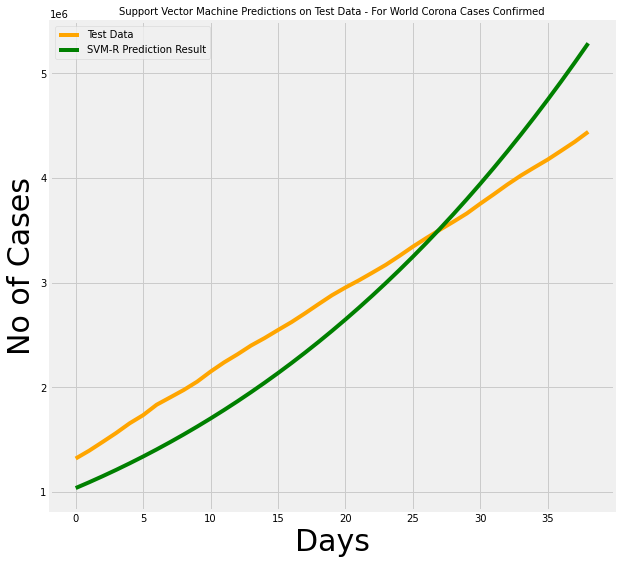

In [35]:
# Predictions of test set y values by passing test set x values

SVR_TestDataPredictionResult = SVR_Model.predict(X_Test)
plt.figure(figsize=(9,9))

plt.title("Support Vector Machine Predictions on Test Data - For World Corona Cases Confirmed", size = 10)
plt.xlabel('Days', size=30)
plt.ylabel('No of Cases', size=30)
plt.plot(y_Test, color = 'orange')

plt.plot(SVR_TestDataPredictionResult, color = 'green')

plt.legend(['Test Data', 'SVM-R Prediction Result'])



In [36]:
print(y_Test)
print(SVR_TestDataPredictionResult)

[[1321436]
 [1396438]
 [1480232]
 [1565555]
 [1657950]
 [1736032]
 [1835145]
 [1905160]
 [1975566]
 [2055424]
 [2151792]
 [2239634]
 [2317243]
 [2400787]
 [2471727]
 [2549046]
 [2624608]
 [2708403]
 [2795731]
 [2881140]
 [2955033]
 [3023722]
 [3097229]
 [3172287]
 [3256910]
 [3345558]
 [3427584]
 [3506729]
 [3583055]
 [3662691]
 [3756069]
 [3845718]
 [3938064]
 [4024009]
 [4101699]
 [4177502]
 [4261747]
 [4347018]
 [4442163]]
[1039315.46703907 1094976.5533857  1152878.69593051 1213081.25611823
 1275644.37136017 1340628.95503428 1408096.69648505 1478110.06102362
 1550732.28992771 1626027.40044162 1704060.18577626 1784896.21510915
 1868601.8335844  1955244.1623127  2044891.09837137 2137611.3148043
 2233474.26062199 2332550.16080154 2434910.01628664 2540625.60398758
 2649769.47678126 2762414.96351115 2878636.16898736 2998507.97398654
 3122106.035252   3249506.78549359 3380787.43338781 3516025.96357773
 3655301.13667301 3798692.48924993 3946280.33385136 4098145.75898674
 4254370.62913217 4

In [37]:
# Accuracy Measurement
print('SVR Accuracy Measurement')
print('Mean Absolute Error', mean_absolute_error(SVR_TestDataPredictionResult, y_Test))
print('Mean Squared Error:',mean_squared_error(SVR_TestDataPredictionResult, y_Test))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(SVR_TestDataPredictionResult, y_Test)))
# print('Mean Absolute Error:', mean_absolute_error(y_Test, SVR_TestDataPredictionResult))  
# print('Mean Squared Error:', metrics.mean_squared_error(y_Test, SVR_TestDataPredictionResult))  


SVR Accuracy Measurement
Mean Absolute Error 353159.5977344678
Mean Squared Error: 155454232170.5316
Root Mean Squared Error: 394276.8471144756


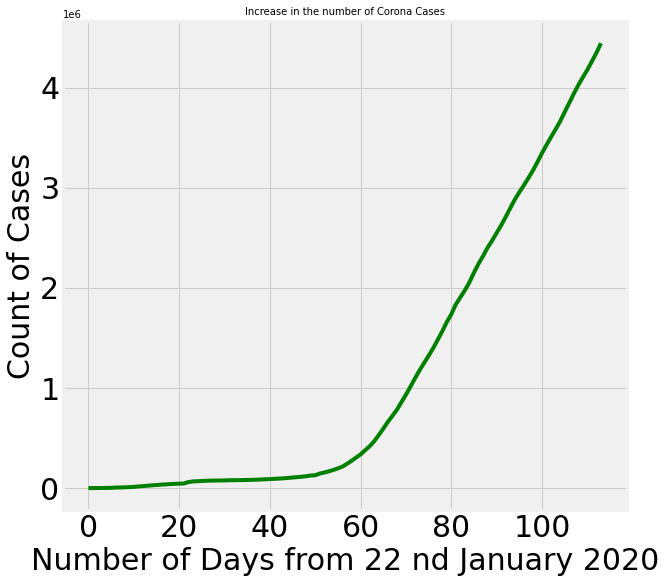

In [38]:
#Line Graph To show the increase in the number of corona cases
DaysExcludingFuture = DaysExcludingFuture.reshape(1, -1)[0]
plt.figure(figsize=(9, 9))
plt.plot(DaysExcludingFuture, TotalWorldCases_List, color = 'green')
plt.title('Increase in the number of Corona Cases', size=10)
plt.xlabel('Number of Days from 22 nd January 2020', size=30)
plt.ylabel('Count of Cases', size=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.show()


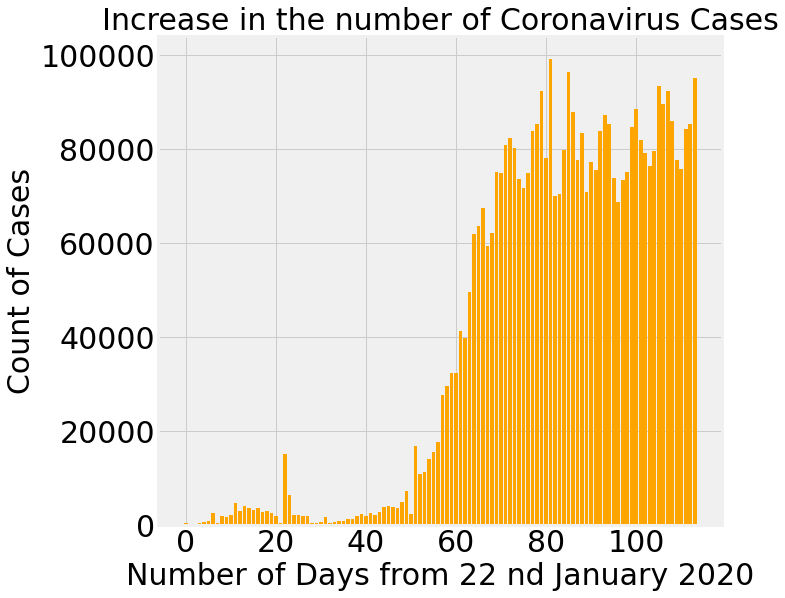

In [39]:
#Bar Graph To show the increase in the number of corona cases

plt.figure(figsize=(9, 9))
plt.bar(DaysExcludingFuture, DailyIncrease_ForWorldCases, color = 'orange')
plt.title('Increase in the number of Coronavirus Cases', size=30)
plt.xlabel('Number of Days from 22 nd January 2020', size=30)
plt.ylabel('Count of Cases', size=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.show()

In [0]:
# print('Actual Values')
# print(y_Test)

In [0]:
# print('Predicted Values')
# print(SVR_TestDataPredictionResult.reshape(-1,1))

In [42]:
print(Concat_PastNFutureDays[Current_Day:Next_30Day])

[[113]
 [114]
 [115]
 [116]
 [117]
 [118]
 [119]
 [120]
 [121]
 [122]
 [123]
 [124]
 [125]
 [126]
 [127]
 [128]
 [129]
 [130]
 [131]
 [132]
 [133]
 [134]
 [135]
 [136]
 [137]
 [138]
 [139]
 [140]
 [141]
 [142]]


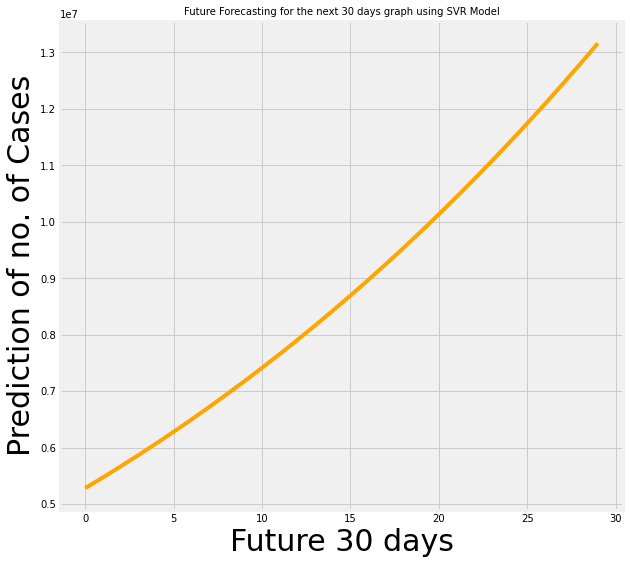

In [43]:
#Future prediction for next 30 days
plt.figure(figsize=(9, 9))
plt.title("Future Forecasting for the next 30 days graph using SVR Model", size = 10)
plt.xlabel('Future 30 days', size=30)
plt.ylabel('Prediction of no. of Cases', size=30)
# newdates = Concat_PastNFutureDays[Current_Day:Next_30Day]
# newdates = newdates.reshape(1, -1)[0]
SVR_FutureDataPredictionResult = SVR_Model.predict(Concat_PastNFutureDays[Current_Day:Next_30Day])
plt.plot(SVR_FutureDataPredictionResult, color = 'orange')


In [44]:
print(SVR_FutureDataPredictionResult)

[ 5287950.37766611  5477048.74940568  5671189.41676133  5870461.22790844
  6074953.8069891   6284757.55411191  6499963.64535213  6720664.0327516
  6946951.44431872  7178919.38402853  7416662.13182267  7660274.74360935
  7909853.05126341  8165493.66262625  8427293.9615059   8695352.10767694
  8969767.03688065  9250638.46082478  9538066.86718377  9832153.51959862
 10133000.45767692 10440710.49699289 10755387.22908733 11077135.02146763
 11406059.01760776 11742265.13694837 12085860.07489656 12436951.30282623
 12795647.06807771 13162056.39395795]


In [0]:
# print(Concat_PastNFutureDays[Current_Day:Next_30Day])

In [0]:
# print(len(DaysExcludingFuture))

In [0]:
# print(Concat_PastNFutureDays_dates)

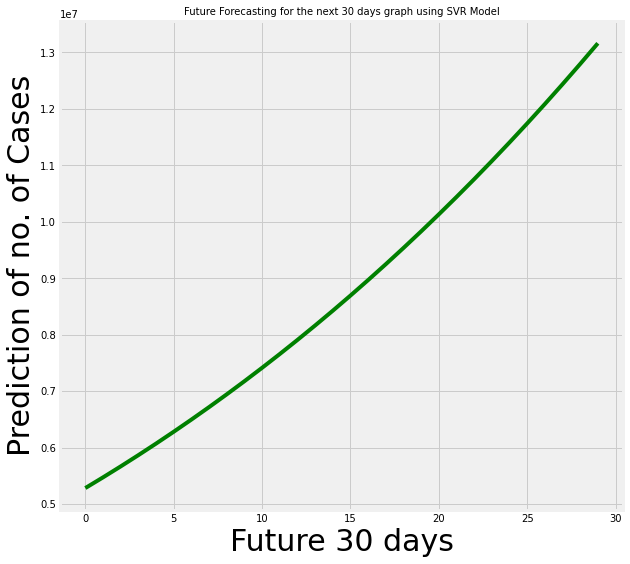

In [48]:
#Line Graph To show the increase in the number of corona cases for future 30 days

newdates = Concat_PastNFutureDays[Current_Day:Next_30Day]
newdates = newdates.reshape(1, -1)[0]
plt.figure(figsize=(9, 9))
plt.plot(SVR_FutureDataPredictionResult, color = 'green')
plt.title('Future Forecasting for the next 30 days graph using SVR Model', size=10)
plt.xlabel('Future 30 days', size=30)
plt.ylabel('Prediction of no. of Cases', size=30)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [49]:
print(Concat_PastNFutureDays[Current_Day:Next_30Day])
print(newdates)
# newdates = Concat_PastNFutureDays[Current_Day:Next_30Day] + 1

[[113]
 [114]
 [115]
 [116]
 [117]
 [118]
 [119]
 [120]
 [121]
 [122]
 [123]
 [124]
 [125]
 [126]
 [127]
 [128]
 [129]
 [130]
 [131]
 [132]
 [133]
 [134]
 [135]
 [136]
 [137]
 [138]
 [139]
 [140]
 [141]
 [142]]
[113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 135 136 137 138 139 140 141 142]


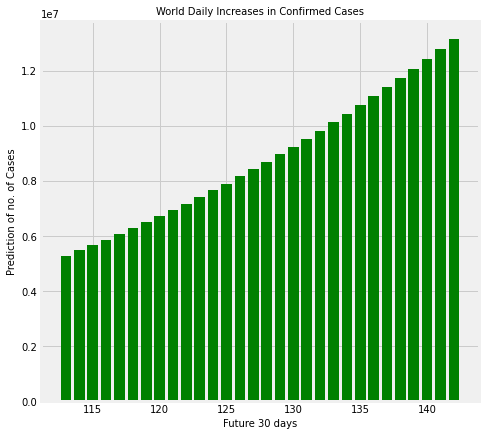

In [50]:
#Bar Graph To show the increase in the number of corona cases for future 30 days

plt.figure(figsize=(7, 7))
plt.bar(newdates, SVR_FutureDataPredictionResult, color = 'green')
plt.title('World Daily Increases in Confirmed Cases', size=10)
plt.xlabel('Future 30 days', size=10)
plt.ylabel('Prediction of no. of Cases', size=10)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()
#########################################################################################################################################################
#########################################################################################################################################################
#########################################################################################################################################################

**###########################       PREDICTIONS FOR DEATHS######################**

In [51]:
X_Train, X_Test, y_Train, y_Test = train_test_split(RecordedCases_StartDate, TotalDeathCases_List, test_size=0.43, shuffle=False) 
print('Creating the Regression Model - SVR - No.of deaths')
SVR_Model = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
SVR_Model.fit(X_Train, y_Train)


Creating the Regression Model - SVR - No.of deaths


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.1, cache_size=200, coef0=0.0, degree=5, epsilon=1, gamma=0.01,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

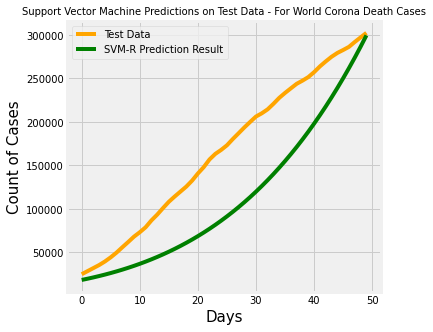

In [52]:
SVR_TestDataPredictionResult = SVR_Model.predict(X_Test)
plt.figure(figsize=(5,5))

plt.title("Support Vector Machine Predictions on Test Data - For World Corona Death Cases", size = 10)
plt.xlabel('Days', size=15)
plt.ylabel('Count of Cases', size=15)
plt.plot(y_Test, color = 'orange')

plt.plot(SVR_TestDataPredictionResult, color = 'green')

plt.legend(['Test Data', 'SVM-R Prediction Result'])



In [53]:
print(SVR_TestDataPredictionResult)
print(y_Test)

[ 18192.87836847  19596.11998621  21088.42368913  22673.96326696
  24357.0409187   26142.08919815  28033.67295983  30036.49130427
  32155.37952371  34395.31104771  36761.39938877  39258.90008789
  41893.21266009  44669.88254019  47594.60302825  50673.2172352
  53911.72002847  57316.25997759  60893.14129974  64648.82580525
  68589.93484364  72723.25124853  77055.72128378  81594.45658898
  86346.73612481  91320.00811866  96521.89201097 101960.18039928
 107642.84098587 113578.01852123 119774.03675111 126239.40036175
 132982.79692558 140013.09884609 147339.36530431 154970.8442042
 162916.97411794 171187.38623158 179791.90629099 188740.5565472
 198043.55770201 207711.33085354 217754.49944172 228183.89119446
 239010.54007279 250245.68821593 261900.7878881  273987.50342339
 286517.71317097 299503.51144128]
[[ 24788]
 [ 28288]
 [ 31798]
 [ 35323]
 [ 39439]
 [ 44238]
 [ 49675]
 [ 55817]
 [ 61812]
 [ 67981]
 [ 73077]
 [ 78767]
 [ 86662]
 [ 93354]
 [100882]
 [108113]
 [114146]
 [119853]
 [125561]

In [54]:
print('SVR Accuracy Measurement')
print('Mean Absolute Error', mean_absolute_error(SVR_TestDataPredictionResult, y_Test))
print('Mean Squared Error:',mean_squared_error(SVR_TestDataPredictionResult, y_Test))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(SVR_TestDataPredictionResult, y_Test)))

SVR Accuracy Measurement
Mean Absolute Error 52862.72077149398
Mean Squared Error: 3501612291.1671224
Root Mean Squared Error: 59174.42260949508


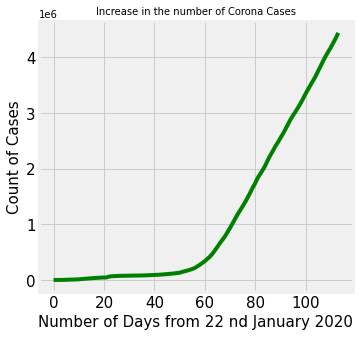

In [55]:
# line graph
DaysExcludingFuture = DaysExcludingFuture.reshape(1, -1)[0]
plt.figure(figsize=(5, 5))
plt.plot(DaysExcludingFuture, TotalWorldCases_List, color = 'green')
plt.title('Increase in the number of Corona Cases', size=10)
plt.xlabel('Number of Days from 22 nd January 2020', size=15)
plt.ylabel('Count of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


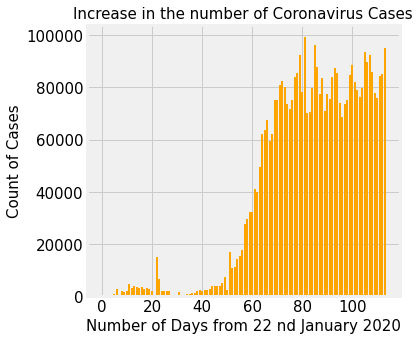

In [56]:
# Bar Graph
plt.figure(figsize=(5, 5))
plt.bar(DaysExcludingFuture, DailyIncrease_ForWorldCases, color = 'orange')
plt.title('Increase in the number of Coronavirus Cases', size=15)
plt.xlabel('Number of Days from 22 nd January 2020', size=15)
plt.ylabel('Count of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

Text(0, 0.5, 'Count of Cases')

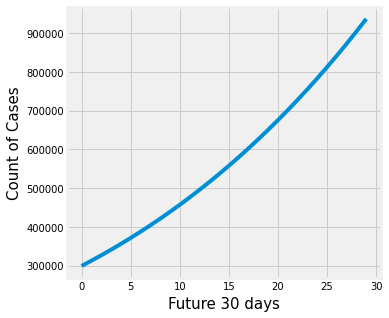

In [57]:
# Print('Future Forecasting graph')
SVR_TestDataPredictionResult = SVR_Model.predict(Concat_PastNFutureDays[Current_Day:Next_30Day])
plt.figure(figsize=(5,5))
plt.plot(SVR_TestDataPredictionResult)
plt.xlabel('Future 30 days', size=15)
plt.ylabel('Count of Cases', size=15)

In [58]:
print(SVR_TestDataPredictionResult)

[299503.51144128 312957.21045276 326891.34227362 341318.66077276
 356252.14356106 371704.99393796 387690.64283993 404222.75078126
 421315.20980363 438982.14541962 457237.91855954 476097.12751507
 495574.60988873 515685.44453358 536444.95350473 557868.70400094
 579972.51031386 602772.43576848 626284.79467218 650526.15426206
 675513.33664679 701263.4207527  727793.74427288 755121.90560847
 783265.76581406 812243.45055079 842073.35202228 872774.13092452
 904364.71839302 936864.31794661]


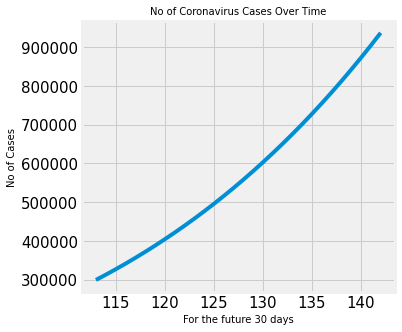

In [59]:
#Graph for the next 30 days for number of deaths
newdates = Concat_PastNFutureDays[Current_Day:Next_30Day]
newdates = newdates.reshape(1, -1)[0]
plt.figure(figsize=(5, 5))
plt.plot(newdates, SVR_TestDataPredictionResult)
plt.title('No of Coronavirus Cases Over Time', size=10)
plt.xlabel('For the future 30 days', size=10)
plt.ylabel('No of Cases', size=10)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

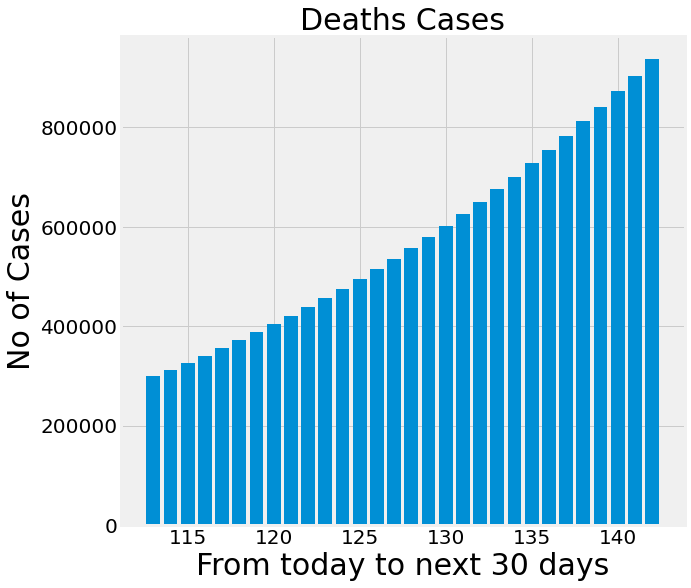

In [60]:
plt.figure(figsize=(9, 9))
plt.bar(newdates, SVR_TestDataPredictionResult)
plt.title('Deaths Cases', size=30)
plt.xlabel('From today to next 30 days', size=30)
plt.ylabel('No of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


**###########################       PREDICTIONS FOR RECOVERIES ######################**



In [61]:
X_Train, X_Test, y_Train, y_Test = train_test_split(RecordedCases_StartDate, TotalRecoveredCases_List, test_size=0.37, shuffle=False) 
print('Creating the Regression Model - SVR - No.of deaths')
SVR_Model = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
SVR_Model.fit(X_Train, y_Train)


Creating the Regression Model - SVR - No.of deaths


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.1, cache_size=200, coef0=0.0, degree=5, epsilon=1, gamma=0.01,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

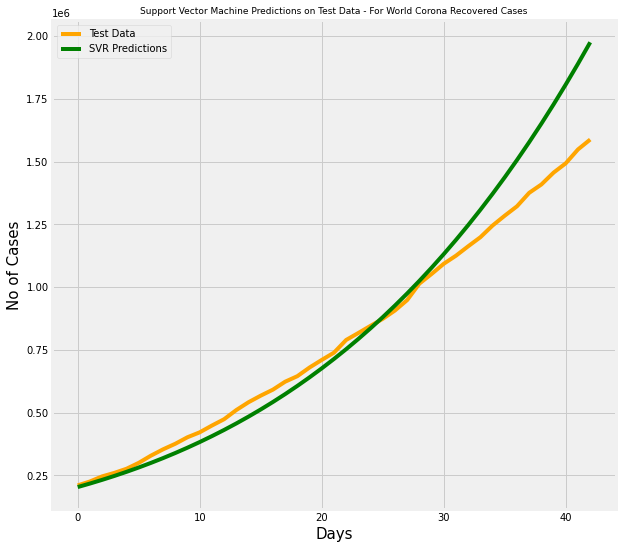

In [62]:
SVR_TestDataPredictionResult = SVR_Model.predict(X_Test)
plt.figure(figsize=(9, 9))
plt.plot(y_Test, color = 'orange')
plt.plot(SVR_TestDataPredictionResult, color = 'green')
plt.title("Support Vector Machine Predictions on Test Data - For World Corona Recovered Cases", size = 9)
plt.xlabel('Days', size=15)
plt.ylabel('No of Cases', size=15)
plt.legend(['Test Data', 'SVR Predictions'])

In [63]:
print(y_Test)
print(SVR_TestDataPredictionResult)

[[ 210269]
 [ 225814]
 [ 246152]
 [ 260023]
 [ 276534]
 [ 300054]
 [ 328703]
 [ 353989]
 [ 376104]
 [ 402120]
 [ 421722]
 [ 448672]
 [ 473980]
 [ 510516]
 [ 541592]
 [ 567765]
 [ 591719]
 [ 623307]
 [ 645308]
 [ 679905]
 [ 710046]
 [ 738980]
 [ 789585]
 [ 817405]
 [ 845985]
 [ 873677]
 [ 906955]
 [ 948425]
 [1013886]
 [1052415]
 [1093137]
 [1125236]
 [1162724]
 [1198832]
 [1245413]
 [1284741]
 [1322050]
 [1375624]
 [1408980]
 [1456209]
 [1493414]
 [1548547]
 [1587893]]
[ 203636.5430209   217567.05830463  232293.3662069   247849.08523716
  264268.76766353  281587.91230402  299842.97731786  319071.39299634
  339311.57455448  360602.93492179  382985.89753394  406501.9091238
  431193.45251256  457104.05940058  484278.32315979  512761.91162346
  542601.57987856  573845.18305625  606541.68912336  640741.19167354
  676494.92271898  713855.26548062  752875.76717984  793611.15183053
  836117.33302935  880451.42674559  926671.76411637  974837.90423336
 1025010.64693737 1077252.04560756 1131625.4

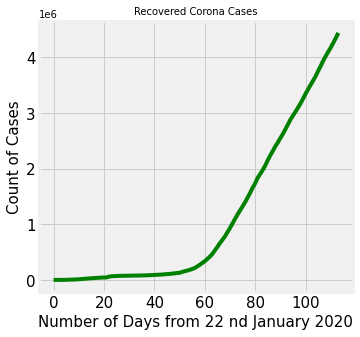

In [64]:
#Line Graph for the since 22nd jan recovered
DaysExcludingFuture = DaysExcludingFuture.reshape(1, -1)[0]
plt.figure(figsize=(5, 5))
plt.plot(DaysExcludingFuture, TotalWorldCases_List, color = 'green')
plt.title('Recovered Corona Cases', size=10)
plt.xlabel('Number of Days from 22 nd January 2020', size=15)
plt.ylabel('Count of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


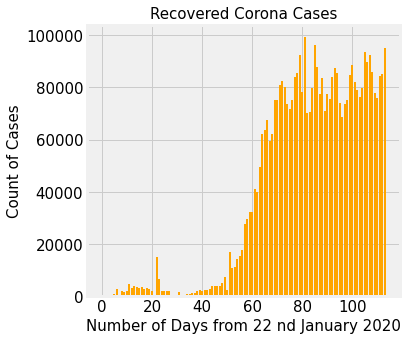

In [65]:
# Bar Graph since 22nd jan 2020

plt.figure(figsize=(5, 5))
plt.bar(DaysExcludingFuture, DailyIncrease_ForWorldCases, color = 'orange')
plt.title('Recovered Corona Cases', size=15)
plt.xlabel('Number of Days from 22 nd January 2020', size=15)
plt.ylabel('Count of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

Text(0, 0.5, 'No of Cases')

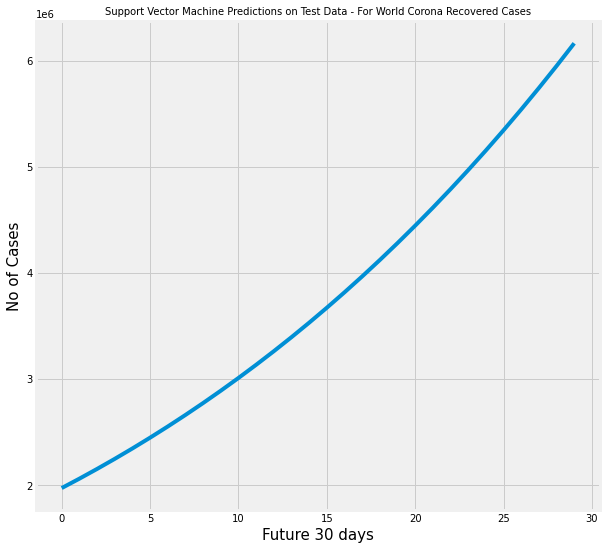

In [66]:
# Print('Future Forecasting SVR')
SVR_TestDataPredictionResult = SVR_Model.predict(Concat_PastNFutureDays[Current_Day:Next_30Day])
plt.figure(figsize=(9, 9))
plt.plot(SVR_TestDataPredictionResult)
plt.title("Support Vector Machine Predictions on Test Data - For World Corona Recovered Cases", size = 10)
plt.xlabel('Future 30 days', size=15)
plt.ylabel('No of Cases', size=15)


In [67]:
print(SVR_TestDataPredictionResult)

[1975232.80187776 2063683.41384378 2155292.60517367 2250144.22547724
 2348323.59535118 2449917.51917609 2555014.29790291 2663703.741847
 2776077.18347808 2892227.49020996 3012249.07719472 3136237.92011275
 3264291.5679644  3396509.15585932 3532991.41780868 3673840.69951751
 3819160.97117665 3969057.84024849 4123638.56426647 4283012.06361869
 4447288.93434289 4616581.46091917 4791003.62905612 4970671.13848724
 5155701.41576078 5346213.62702718 5542328.69083645 5744169.29092183
 5951859.88899901 6165526.73755505]


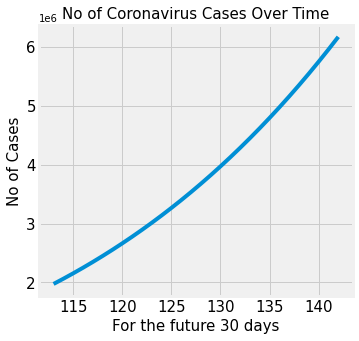

In [68]:
#Line Graph for the next 30 days for number of deaths
newdates = Concat_PastNFutureDays[Current_Day:Next_30Day]
newdates = newdates.reshape(1, -1)[0]
plt.figure(figsize=(5, 5))
plt.plot(newdates, SVR_TestDataPredictionResult)
plt.title('No of Coronavirus Cases Over Time', size=15)
plt.xlabel('For the future 30 days', size=15)
plt.ylabel('No of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

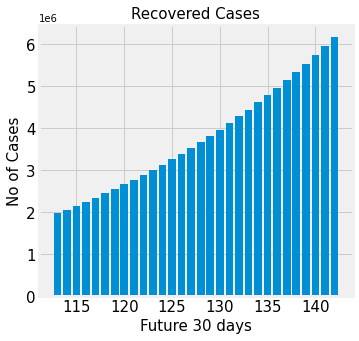

In [69]:
plt.figure(figsize=(5, 5))
plt.bar(newdates, SVR_TestDataPredictionResult)
plt.title('Recovered Cases', size=15)
plt.xlabel('Future 30 days', size=15)
plt.ylabel('No of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

  **###################           Predictions for USA.        **









In [70]:
us_confirmed_dates = corona_confirmed_cases.loc[:, Retrive_Required_Dates_Columns[4]:Retrive_Required_Dates_Columns[-1]]
us_confirmed_dates_keys = us_confirmed_dates.keys()
print(us_confirmed_dates_keys)
days_since_feb = np.array([i for i in range(len(us_confirmed_dates_keys))]).reshape(-1, 1)


Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/5/20', '5/6/20', '5/7/20', '5/8/20', '5/9/20', '5/10/20', '5/11/20',
       '5/12/20', '5/13/20', '5/14/20'],
      dtype='object', length=114)


In [0]:
# print(len(days_since_feb))

[[ 33]
 [ 10]
 [ 90]
 [  7]
 [ 24]
 [ 73]
 [113]
 [ 22]
 [ 94]
 [  2]
 [ 48]
 [ 89]
 [ 51]
 [ 71]
 [105]
 [ 93]
 [ 59]
 [ 66]
 [ 16]
 [ 13]
 [ 68]
 [106]
 [ 26]]


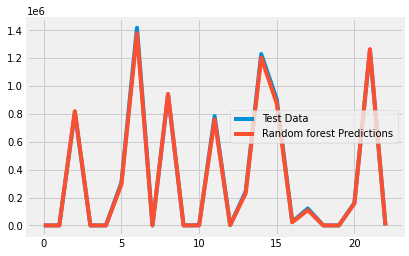

In [72]:


us_cases = [] 
us_deaths = [] 
us_recoveries = [] 


for i in us_confirmed_dates_keys:
   # case studies 
    us_cases.append(corona_confirmed_cases[corona_confirmed_cases['Country/Region']=='US'][i].sum())
    us_deaths.append(corona_deaths_cases[corona_deaths_cases['Country/Region']=='US'][i].sum())
    us_recoveries.append(corona_recovered_cases[corona_recovered_cases['Country/Region']=='US'][i].sum())

us_CalculateDailyRiseOfCases = CalculateDailyRiseOfCases(us_cases)
us_daily_death = CalculateDailyRiseOfCases(us_deaths)
us_daily_recovery = CalculateDailyRiseOfCases(us_recoveries)


# bayesian_poly = PolynomialFeatures(degree=6)
# bayesian_poly_X_Train = bayesian_poly.fit_transform(X_Train)
# bayesian_poly_X_Test = bayesian_poly.fit_transform(X_Test)
# bayesian_poly_Concat_PastNFutureDays = bayesian_poly.fit_transform(Concat_PastNFutureDays)


# # polynomial regression
# linear_model = LinearRegression(normalize=True, fit_intercept=False)
# linear_model.fit(poly_X_Train, y_Train)
# test_linear_pred = linear_model.predict(poly_X_Test)
# linear_pred = linear_model.predict(poly_Concat_PastNFutureDays)
# print('MAE:', mean_absolute_error(test_linear_pred, y_Test))
# print('MSE:',mean_squared_error(test_linear_pred, y_Test))


X_Train, X_Test, y_Train, y_Test = train_test_split(days_since_feb, us_cases, test_size=0.20, random_state = 0)
print(X_Test)
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0)
regressor.fit(X_Train, y_Train)

regression_pred = regressor.predict(X_Test)
plt.plot(y_Test)
plt.plot(regression_pred)

plt.legend(['Test Data', 'Random forest Predictions'])

# X_grid = np.arange(min(X_Train), max(X_Train), 0.01)
# X_grid = X_grid.reshape((len(X_grid), 1))
# plt.scatter(X_Train, y_Train, color = 'red')
# plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
# plt.title('# of Coronavirus Cases Over Time in USA', size=30)
# plt.xlabel('Till date', size=30)
# plt.ylabel('# of Cases', size=30)
# plt.show()



In [73]:
us_cases

[1,
 1,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 7,
 8,
 8,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 15,
 15,
 15,
 51,
 51,
 57,
 58,
 60,
 68,
 74,
 98,
 118,
 149,
 217,
 262,
 402,
 518,
 583,
 959,
 1281,
 1663,
 2179,
 2727,
 3499,
 4632,
 6421,
 7783,
 13747,
 19273,
 25600,
 33276,
 43843,
 53736,
 65778,
 83836,
 101657,
 121465,
 140909,
 161831,
 188172,
 213242,
 243622,
 275367,
 308650,
 336802,
 366317,
 397121,
 428654,
 462780,
 496535,
 526396,
 555313,
 580619,
 607670,
 636350,
 667592,
 699706,
 732197,
 758809,
 784326,
 811865,
 840351,
 869170,
 905358,
 938154,
 965785,
 988197,
 1012582,
 1039909,
 1069424,
 1103461,
 1132539,
 1158040,
 1180375,
 1204351,
 1229331,
 1257023,
 1283929,
 1309550,
 1329260,
 1347881,
 1369376,
 1390406,
 1417774]

In [74]:
print(regression_pred)
print(y_Test)


[2.57180000e+01 7.24200000e+00 8.19468960e+05 5.04000000e+00
 1.28990000e+01 2.94769006e+05 1.37916992e+06 1.22080000e+01
 9.42906751e+05 1.41000000e+00 7.56665000e+02 7.60355839e+05
 1.95010900e+03 2.30207836e+05 1.20388691e+06 8.75122060e+05
 2.26382820e+04 1.09863066e+05 1.10020000e+01 1.06930000e+01
 1.56554002e+05 1.26418661e+06 1.30080000e+01]
[51, 8, 811865, 5, 13, 308650, 1417774, 13, 938154, 2, 959, 784326, 2179, 243622, 1229331, 905358, 25600, 121465, 11, 11, 161831, 1257023, 13]


[1379169.923 1379169.923 1379169.923 1379169.923 1379169.923 1379169.923
 1379169.923 1379169.923 1379169.923 1379169.923 1379169.923 1379169.923
 1379169.923 1379169.923 1379169.923 1379169.923 1379169.923 1379169.923
 1379169.923 1379169.923 1379169.923 1379169.923 1379169.923 1379169.923
 1379169.923 1379169.923 1379169.923 1379169.923 1379169.923 1379169.923]


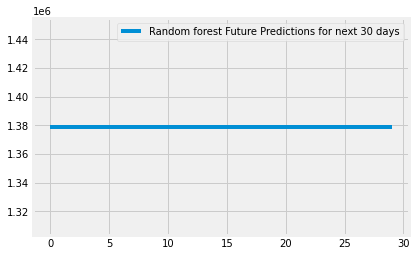

In [75]:
reg_pred = regressor.predict(Concat_PastNFutureDays[Current_Day:Next_30Day])
plt.plot(reg_pred)
plt.legend(['Random forest Future Predictions for next 30 days'])
print(reg_pred)

In [0]:
# X_grid = np.arange(min(X_Test), max(X_Test), 0.01)
# X_grid = X_grid.reshape((len(X_grid), 1))
# plt.scatter(X_Test, y_Test, color = 'red')
# plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
# plt.title('# of Coronavirus Cases Over Time in USA', size=30)
# plt.xlabel('Till date', size=30)
# plt.ylabel('# of Cases', size=30)
# plt.show()



In [0]:
# print(regressor.predict(X_grid))

In [0]:
# print(y_Test)


In [0]:
# plt.plot(y_Test)
# plt.plot(SVR_TestDataPredictionResult)
# plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [0]:

# #Graph for the next 10 days for number of deaths
# newdates = Concat_PastNFutureDays[90:105]
# newdates = newdates.reshape(1, -1)[0]
# plt.figure(figsize=(16, 9))
# plt.plot(newdates, SVR_TestDataPredictionResult)
# plt.title('# of Coronavirus Cases Over Time in USA', size=30)
# plt.xlabel('For the future 30 days', size=30)
# plt.ylabel('# of Cases', size=30)
# plt.xticks(size=20)
# plt.yticks(size=20)
# plt.show()

# plt.figure(figsize=(16, 9))
# plt.bar(newdates, SVR_TestDataPredictionResult)
# plt.title('Number of Cases in USA for future 30 days', size=30)
# plt.xlabel('From today to next 30 days', size=30)
# plt.ylabel('# of Cases', size=30)
# plt.xticks(size=20)
# plt.yticks(size=20)
# plt.show()

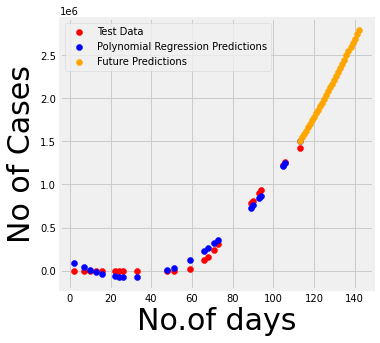

In [81]:
#Polynomial Regression
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_Train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_Train)

plt.figure(figsize=(5, 5))

# Actual values for testing part
plt.scatter(X_Test, y_Test, color='red')
# Prediction values for test part
plt.scatter(X_Test, pol_reg.predict(poly_reg.fit_transform(X_Test)), color='blue')
# Predictions for future 30 days
plt.scatter(Concat_PastNFutureDays[Current_Day:Next_30Day], pol_reg.predict(poly_reg.fit_transform(Concat_PastNFutureDays[Current_Day:Next_30Day])), color='orange')

# plt.title('Recovered Cases', size=30)
plt.xlabel('No.of days', size=30)
plt.ylabel('No of Cases', size=30)
plt.legend(['Test Data', 'Polynomial Regression Predictions', 'Future Predictions'])

plt.show()


In [82]:
print("present")
print(y_Test)

print("prediction")

print(pol_reg.predict(poly_reg.fit_transform(X_Test)))

print("future")


print(pol_reg.predict(poly_reg.fit_transform(Concat_PastNFutureDays[Current_Day:Next_30Day])))


present
[51, 8, 811865, 5, 13, 308650, 1417774, 13, 938154, 2, 959, 784326, 2179, 243622, 1229331, 905358, 25600, 121465, 11, 11, 161831, 1257023, 13]
prediction
[ -71178.50748787    9557.24505195  757569.03003631   37686.4339617
  -68014.50342849  356976.42678423 1507118.58478861  -62347.72925213
  870778.27777741   93593.25577462    4771.71508304  730394.82313811
   32145.29399771  318421.48350698 1219331.17528915  841799.10281989
  124996.15308945  229930.86057344  -34517.59836708  -14510.76572431
  263973.38370236 1253725.25442467  -71876.30954551]
future
[1507118.58478861 1545122.60004279 1583577.85731181 1622484.35659565
 1661842.09789433 1701651.08120784 1741911.30653618 1782622.77387936
 1823785.48323737 1865399.43461021 1907464.62799788 1949981.06340039
 1992948.74081773 2036367.6602499  2080237.8216969  2124559.22515874
 2169331.87063541 2214555.75812691 2260230.88763325 2306357.25915441
 2352934.87269041 2399963.72824125 2447443.82580691 2495375.16538741
 2543757.74698274 25